# Thông tin
1. MSSV: 20520465
2. Họ tên: Nguyễn Vũ Dương
3. Bài tập: 1
4. Ngày thực hiện: 28/02/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

In [ ]:
img =  cv.imread('/content/drive/MyDrive/CS231.M21.KHCL/Baitap/Baitap1/images/lena.jpg',0)

#Yêu cầu 1 : Đọc ảnh



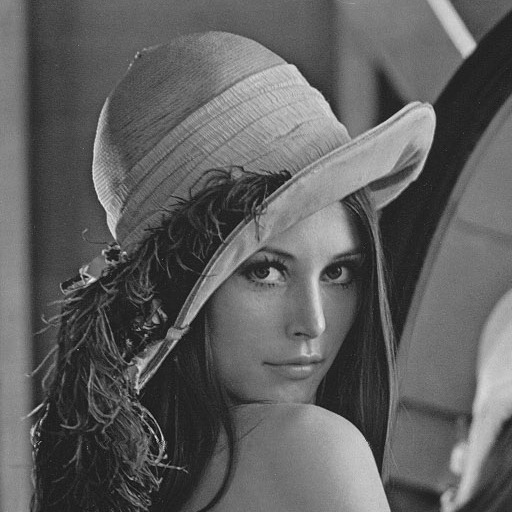

In [ ]:
cv2_imshow(img)

## Tính và hiển thị histogram



In [ ]:
hist = np.histogram(img.flatten(),256,[0,256])
print(hist)

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    1,
          1,    5,    3,    2,    3,    6,   10,   10,   12,   23,   43,
         42,   76,   95,  155,  219,  317,  475,  646, 1020, 1513, 2146,
       2876, 3822, 4398, 4651, 4626, 4220, 3814, 3315, 2760, 2448, 2161,
       1893, 1749, 1625, 1550, 1585, 1404, 1397, 1432, 1296, 1262, 1306,
       1229, 1218, 1155, 1190, 1223, 1295, 1281, 1363, 1417, 1472, 1504,
       1664, 1710, 1795, 1756, 1675, 1799, 1709, 1699, 1657, 1632, 1607,
       1538, 1578, 1516, 1486, 1553, 1596, 1574, 1610, 1612, 1706, 1680,
       1728, 1753, 1862, 1949, 1842, 2060, 2070, 2059, 2238, 2246, 2215,
       2314, 2237, 2282, 2261, 2266, 2308, 2351, 2486, 2605, 2588, 2633,
       2797, 2881, 2828, 2876, 2872, 2802, 2758, 2620, 2599, 2378, 2287,
       2172, 2208, 2044, 1987, 1821, 1650, 1564, 1419, 1398, 1385, 1336,
       1413, 1421, 1466, 1462, 1456, 1258, 1330, 1236, 1179, 1121, 1038,
        965,  893,  839,  789,  674,  720,  653,  

In [ ]:
def display_histogram(imagine):
  hist = cv.calcHist([imagine],[0],None,[256],[0,256])
  #Hiển thị histogram
  plt.plot(hist)
  plt.xlim([0,256])
  plt.legend(('histogram'),loc = 'upper left')
  plt.show()

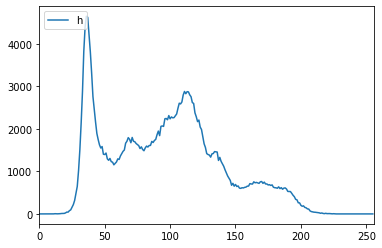

In [ ]:
display_histogram(img)

#Yêu cầu 2: Tính khoảng cách giữa các cặp ảnh

In [ ]:
def TinhHist(pathfilmename):
  img = cv.imread(pathfilmename,0)
  hist = cv.calcHist([img],[0],None,[256],[0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist/size
  return hist

In [ ]:
path = '/content/drive/MyDrive/CS231.M21.KHCL/Baitap/Baitap1/images/'

picture_check = ['image_0814.jpg','image_0816.jpg','image_1248.jpg']

In [ ]:
#Tính Hist cho từng ảnh
hist_img1 = TinhHist(path+picture_check[0])
hist_img2 = TinhHist(path+picture_check[1])
hist_img3 = TinhHist(path+picture_check[2])

Cặp 1:

In [ ]:
print('khoảng cách {} - {} is: {}'.format(picture_check[0],picture_check[1],distance.euclidean(hist_img1,hist_img2)))
print('khoảng cách {} - {} is: {}'.format(picture_check[0],picture_check[2],distance.euclidean(hist_img1,hist_img3)) )

euclidean distance between image_0814.jpg - image_0816.jpg is: 0.03457549676792528
euclidean distance between image_0814.jpg - image_1248.jpg is: 0.1179130091484108


Tính sự tương đồng theo cosin giữa 2 ảnh

In [ ]:
print('cosine-similarity between {} - {} is: {}'.format(picture_check[0],picture_check[1],1 - distance.cosine(hist_img1,hist_img2)))
print('cosine-similarity between {} - {} is: {}'.format(picture_check[0],picture_check[2],1 - distance.cosine(hist_img1,hist_img3)))

cosine-similarity between image_0814.jpg - image_0816.jpg is: 0.9452094176236527
cosine-similarity between image_0814.jpg - image_1248.jpg is: 0.32385099447245347


# Yêu cầu 3 : Cân bằng histogram cho ảnh baby

In [ ]:
def show2img(img_src,img_change):
  plt.figure(figsize=(10, 10))
  #Hiển thị ảnh đầu
  plt.subplot(1,2,1)
  plt.title('original')
  img_src = cv.cvtColor(img_src, cv.COLOR_BGR2RGB)
  img_src = plt.imshow(img_src)
    # Hiển thị ảnh kết quả
  plt.subplot(1,2,2)
  plt.title('imagine after')
  img_rst = cv.cvtColor(img_change, cv.COLOR_BGR2RGB)
  img_rst = plt.imshow(img_change)


In [ ]:
img_name = 'baby.jpg'
#img_name = 'lena.jpg'
img_baby = cv.imread(path+img_name)

In [ ]:
def Histogram_Equalization(img_org):
  img =img_org.copy()
  check=cv.cvtColor(img,cv.COLOR_BGR2YCR_CB)
  channels=cv.split(check)
  cv.equalizeHist(channels[0],channels[0])
  cv.merge(channels,check)
  cv.cvtColor(check,cv.COLOR_YCR_CB2BGR,img)
  return img

In [ ]:
img_equal = Histogram_Equalization(img_baby)

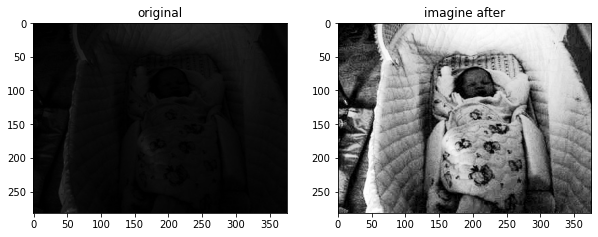

In [ ]:
show2img(img_baby,img_equal)